In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('train_universidad.xlsx', sheetname=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
COD_ENCUESTADO                    20000 non-null int64
Nombre Campus                     20000 non-null int64
NIVEL ACTUAL                      20000 non-null object
Clave de carrera                  20000 non-null int64
Ciclo                             20000 non-null int64
COMENTARIO                        20000 non-null object
IND_GEA                           299 non-null object
IND_DELEGADO                      3532 non-null object
CANT_CURSOS_MATRICU_SIN_INGLES    19634 non-null float64
UOD_depostista_ind_deportista     148 non-null object
NPS                               20000 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.7+ MB


In [6]:
df.head()

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
0,13501,1,AC,3,2,Me gusta la u es paja bro y soy pito,NaN,Delegado,6.0,NaN,3
1,23622,3,AC,25,1,El metodo de blended no le hace bien a todos,NaN,Delegado,5.0,NaN,3
2,8354,4,AC,31,1,"Los profesores, sus métodos de enseñanza bes ...",NaN,NaN,5.0,NaN,4
3,17745,4,AC,28,6,Porque posee gran mayoría de profesores espec...,GEA,NaN,6.0,NaN,3
4,10867,3,AC,34,1,La pencion,NaN,NaN,6.0,NaN,3


### 299 GEA, 3532 delegados, 148 deportistas

In [7]:
df[~df['IND_GEA'].isnull() & ~df['IND_DELEGADO'].isnull() & ~df['UOD_depostista_ind_deportista'].isnull()]

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
753,6366,4,AC,25,3,1.Deberían mejorar la imagen externa de la un...,GEA,Delegado,6.0,Deportista,1
3212,9874,3,AC,7,3,Faltan libros en biblioteca,GEA,Delegado,5.0,Deportista,2


In [8]:
df['COMENTARIO'][753]

' 1.Deberían mejorar la imagen externa de la universidad. Es decir, deberían disminuir las burlas hacia la universidad. 2. deberían mejorar mucho el nivel académico.'

In [9]:
df.describe(include='all')

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
count,20000.000000,20000.000000,20000,20000.000000,20000.00000,20000,299,3532,19634.000000,148,20000.000000
unique,NaN,NaN,4,NaN,NaN,17611,1,1,NaN,1,NaN
top,NaN,NaN,AC,NaN,NaN,La enseñanza,GEA,Delegado,NaN,Deportista,NaN
freq,NaN,NaN,14990,NaN,NaN,111,299,3532,NaN,148,NaN
mean,16951.724850,2.608150,NaN,42.322700,3.05240,NaN,NaN,NaN,4.784965,NaN,3.123350
std,9634.968902,1.050742,NaN,44.518496,2.35532,NaN,NaN,NaN,1.416735,NaN,0.858587
min,1.000000,1.000000,NaN,1.000000,1.00000,NaN,NaN,NaN,0.000000,NaN,1.000000
25%,8727.750000,2.000000,NaN,10.000000,1.00000,NaN,NaN,NaN,4.000000,NaN,3.000000
50%,17070.500000,3.000000,NaN,26.000000,2.00000,NaN,NaN,NaN,5.000000,NaN,3.000000
75%,25274.250000,3.000000,NaN,100.000000,4.00000,NaN,NaN,NaN,6.000000,NaN,4.000000


### 72 carreras y cada campus tiene ~40 carreras

In [10]:
len(df['Clave de carrera'].unique())

72

In [11]:
df.groupby('Nombre Campus')['Clave de carrera'].unique().apply(lambda x: len(x))

Nombre Campus
1    34
2    30
3    42
4    42
Name: Clave de carrera, dtype: int64

### Hay comentarios repetidos

In [12]:
from collections import Counter
comments = Counter()
comments.update(list(df['COMENTARIO']))
comments.most_common(10)

[(' La enseñanza', 111),
 (' Atención al alumno', 78),
 (' Es buena', 71),
 (' La exigencia', 68),
 (' Los profesores', 65),
 (' La calidad de enseñanza', 51),
 (' Infraestructura', 47),
 (' Buenos profesores', 41),
 (' Exigencia', 39),
 (' Porque si', 37)]

In [13]:
df['Clave de carrera'].unique()

array([  3,  25,  31,  28,  34,  40,   5, 109,  26, 105,  13,  12,  21,
       107,  37,   6, 106,  14, 104, 101,  15, 110,   7,  39,   9,  30,
        11,  36,  17,  32,   2, 108,  16,  27,  29,  35, 100,  38,  22,
        33, 217, 111, 103, 223,  24,  10, 222, 214,  18,  20,   4,  23,
         1, 225, 102, 218,   8, 216, 215, 219, 220, 210, 221, 206, 211,
       224,  19, 213, 226, 209, 205, 203], dtype=int64)

In [14]:
df['Clave de carrera'].value_counts()[:10]

5      1616
25     1489
101    1387
31     1374
7      1188
3       839
107     815
37      618
33      581
15      555
Name: Clave de carrera, dtype: int64

### La mayoría califica con una puntuación alta

In [16]:
import seaborn as sns

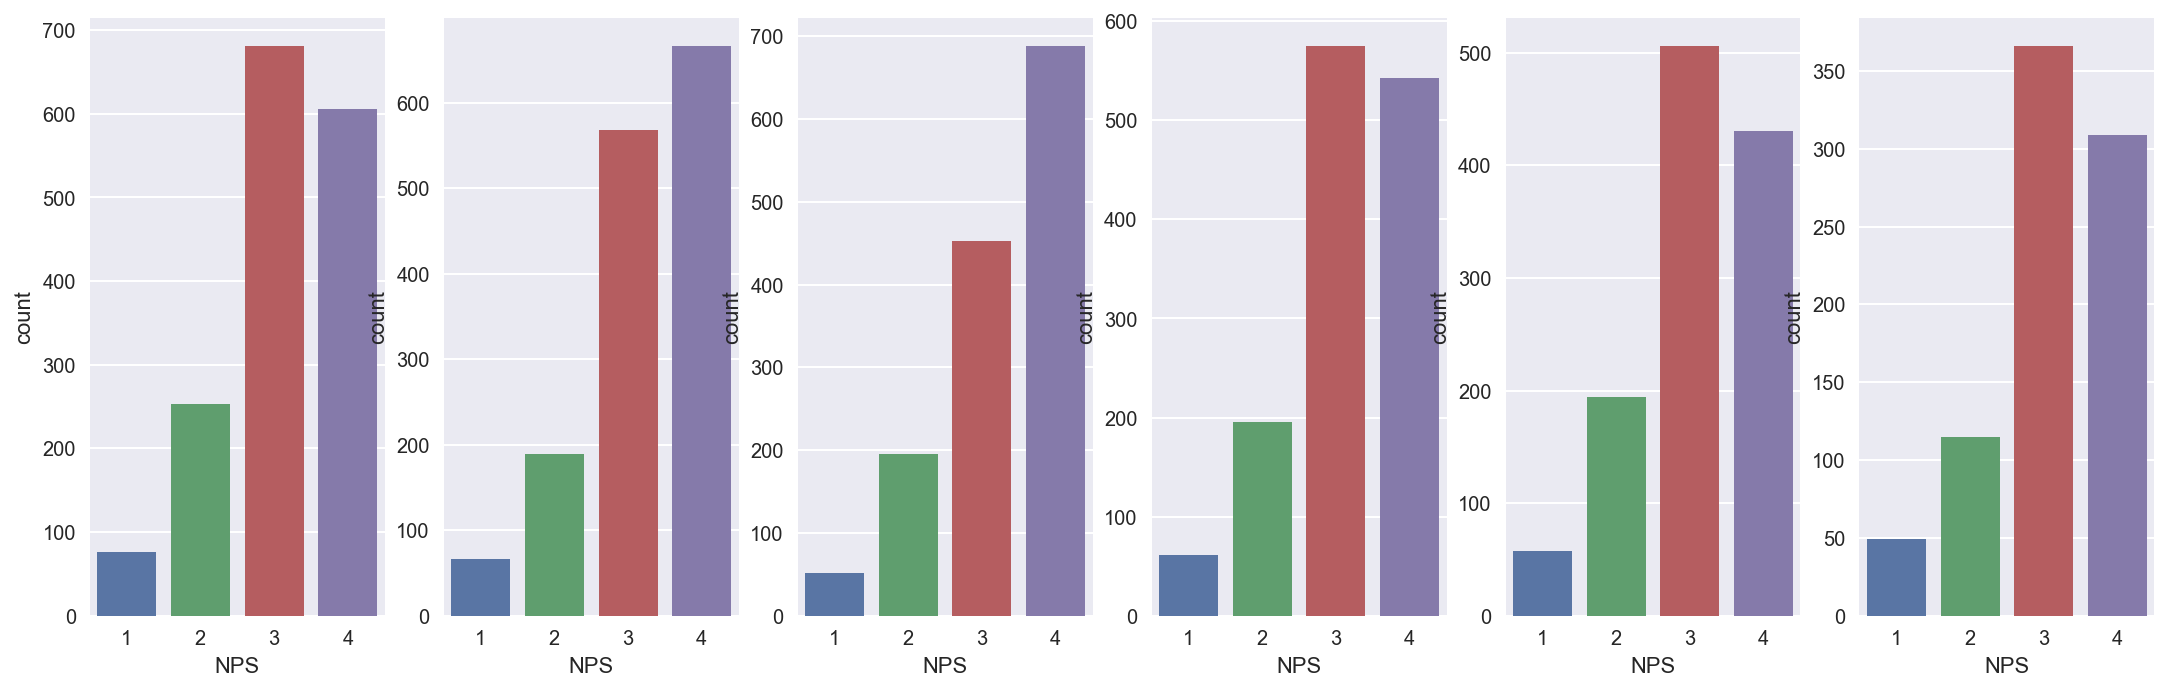

In [17]:
carreras = [5,25,101,31,7,3]
fig, axs = plt.subplots(ncols=len(carreras))
fig.set_size_inches(18.5, 5.5)
for i, carrera in enumerate(carreras):
    sns.countplot(x='NPS', data=df[df['Clave de carrera']==carrera], ax=axs[i])

### Preprocessing

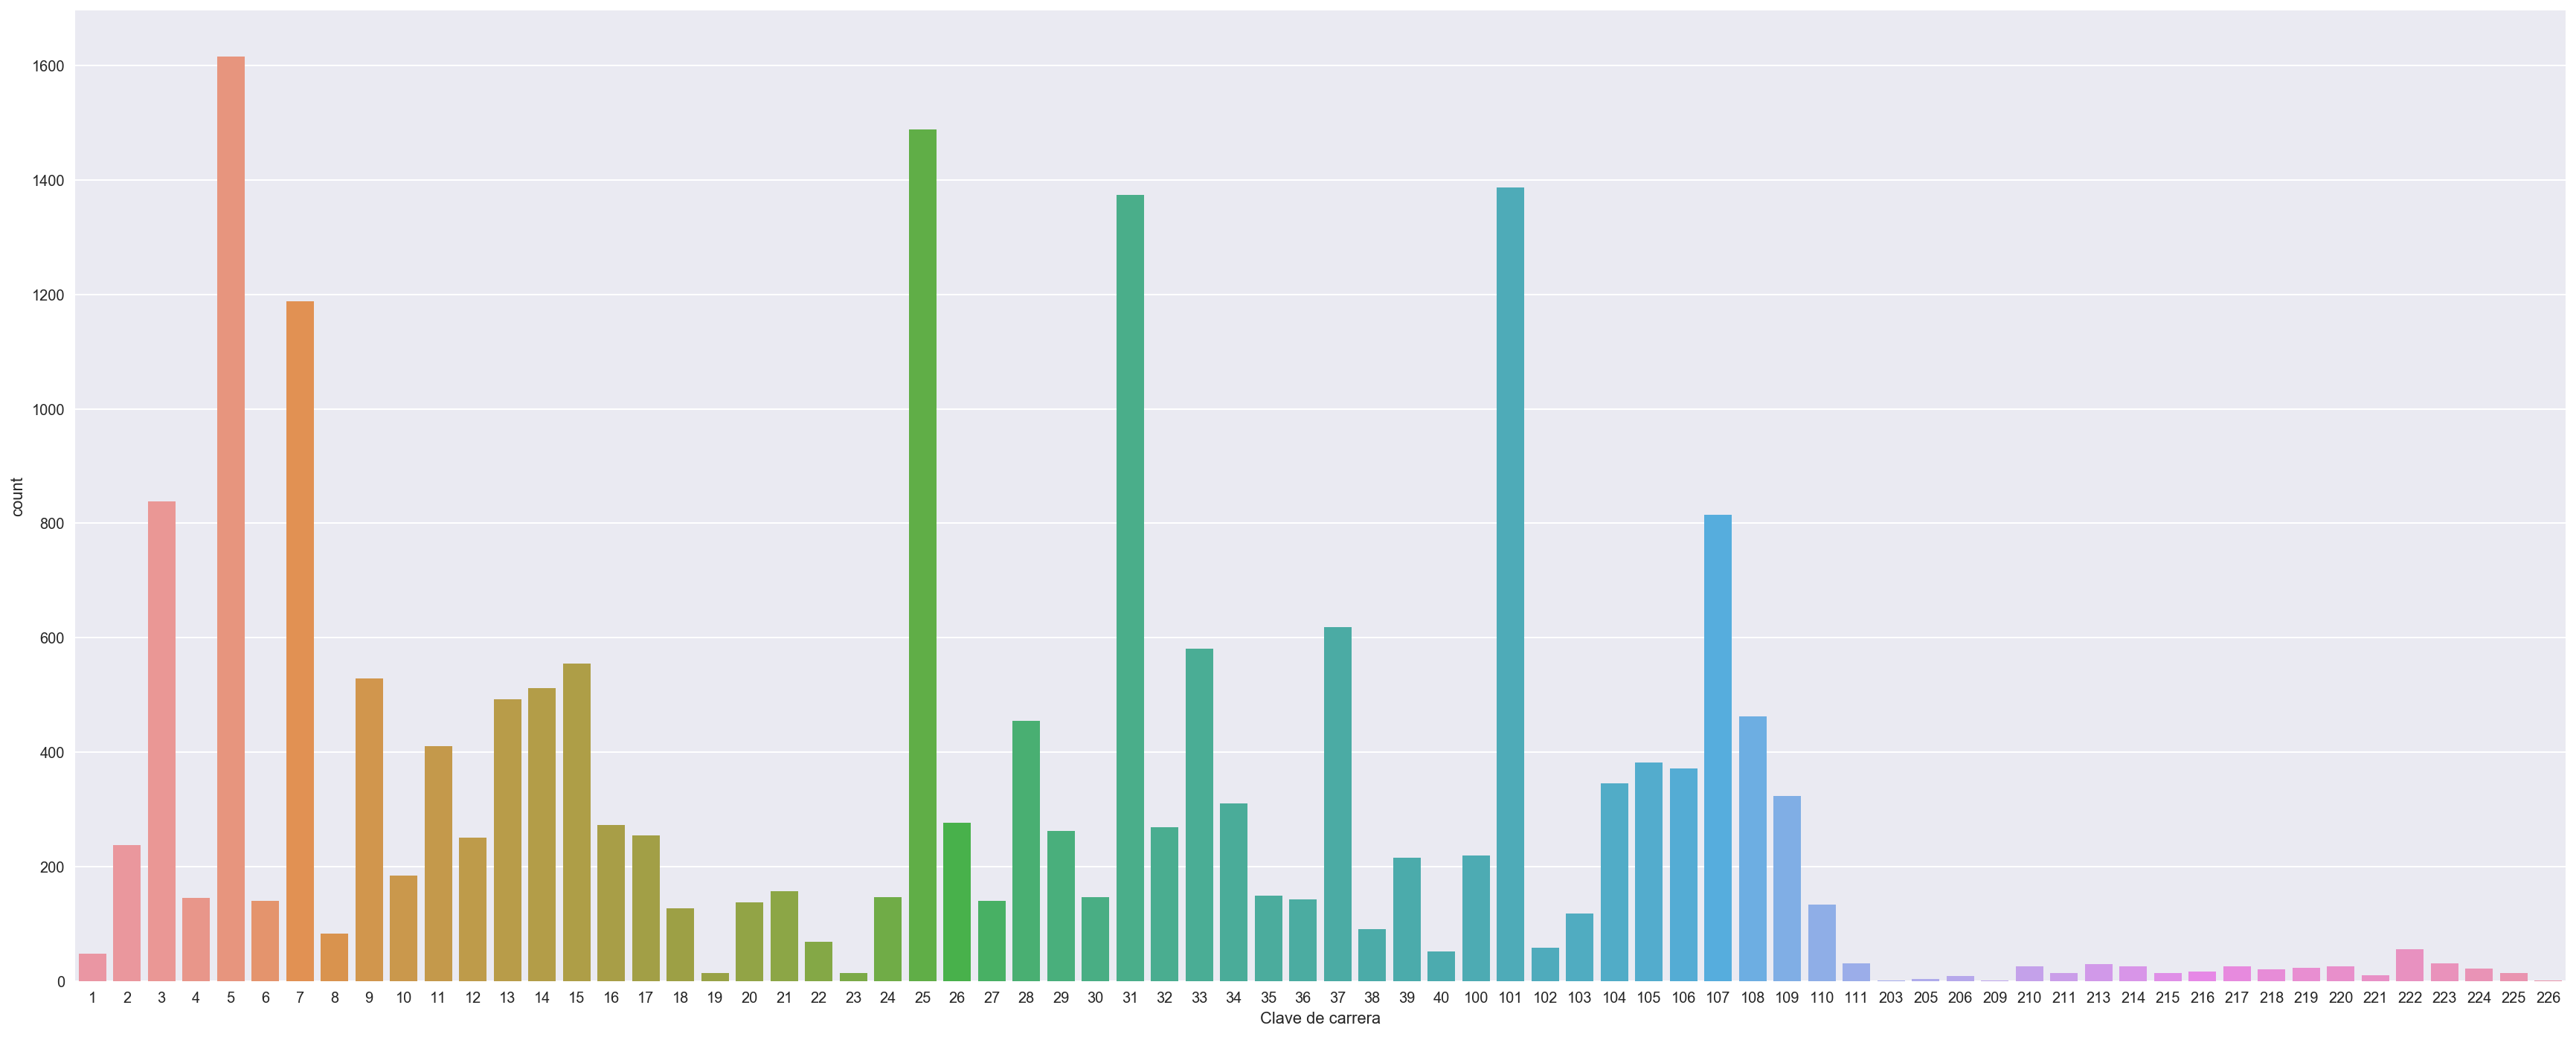

In [18]:
sns.plt.figure(figsize=(30,12))
sns.countplot(x='Clave de carrera', data=df)

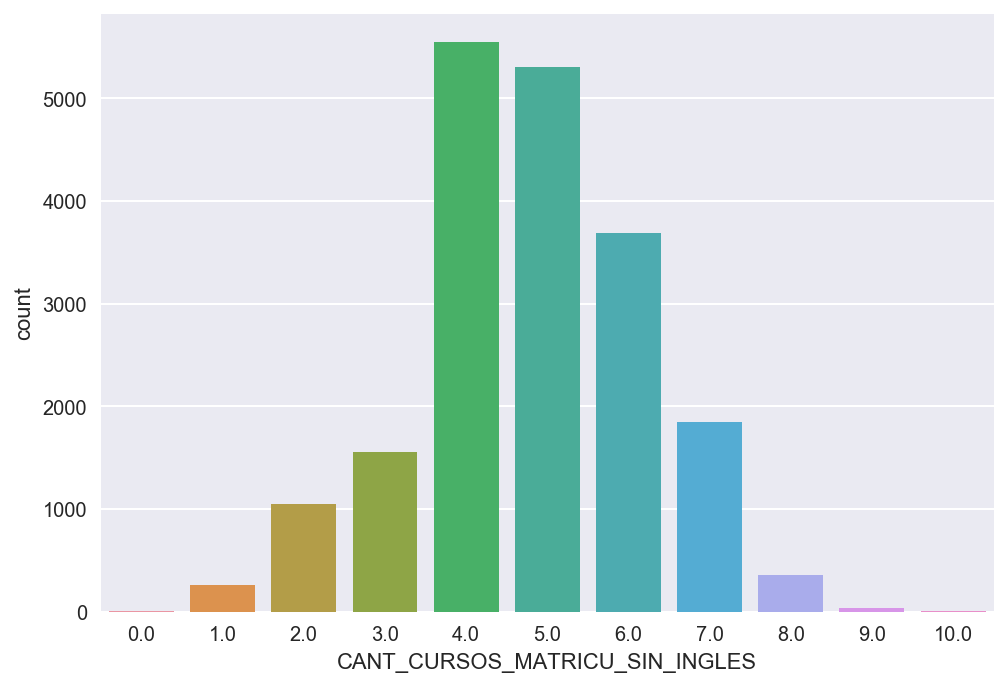

In [20]:
sns.countplot(x='CANT_CURSOS_MATRICU_SIN_INGLES', data=df)

In [19]:
df.head()

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
0,13501,1,AC,3,2,Me gusta la u es paja bro y soy pito,NaN,Delegado,6.0,NaN,3
1,23622,3,AC,25,1,El metodo de blended no le hace bien a todos,NaN,Delegado,5.0,NaN,3
2,8354,4,AC,31,1,"Los profesores, sus métodos de enseñanza bes ...",NaN,NaN,5.0,NaN,4
3,17745,4,AC,28,6,Porque posee gran mayoría de profesores espec...,GEA,NaN,6.0,NaN,3
4,10867,3,AC,34,1,La pencion,NaN,NaN,6.0,NaN,3


- COD_ENCUESTADO: drop
- Nombre Campus: one-hot
- NIVEL ACTUAL: one-hot
- Clave de carrera: one-hot
- Ciclo: OK
- IND_GEA: 0-1
- IND_DELEGADO: 0-1
- CANT_CURSOS_MATRICU_SIN_INGLES: OK
- UOD_depostista_ind_deportista: 0-1

In [46]:
df_ml = df.copy(deep=True)

In [47]:
df_ml = df_ml.drop('COD_ENCUESTADO', axis=1)

In [48]:
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['Nombre Campus'], prefix='Campus')), axis=1)

In [49]:
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['NIVEL ACTUAL'], prefix='Nivel')), axis=1)

In [50]:
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['IND_GEA'], prefix='GEA')), axis=1)

In [51]:
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['IND_DELEGADO'], prefix='Delegado')), axis=1)

In [52]:
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['UOD_depostista_ind_deportista'], prefix='Deportista')), axis=1)

In [53]:
df_ml = df_ml.drop('Nombre Campus', axis=1)
df_ml = df_ml.drop('NIVEL ACTUAL', axis=1)
df_ml = df_ml.drop('IND_GEA', axis=1)
df_ml = df_ml.drop('IND_DELEGADO', axis=1)
df_ml = df_ml.drop('UOD_depostista_ind_deportista', axis=1)
df_ml = df_ml.drop('Clave de carrera', axis=1)
df_ml = df_ml.drop('COMENTARIO', axis=1)

In [54]:
df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'] = df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'].fillna(df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'].median())

In [55]:
df_ml.head()

,Ciclo,CANT_CURSOS_MATRICU_SIN_INGLES,NPS,Campus_1,Campus_2,Campus_3,Campus_4,Nivel_AC,Nivel_FC,Nivel_ON LINE,Nivel_PRESENCIAL,GEA_GEA,Delegado_Delegado,Deportista_Deportista
0,2,6.0,3,1,0,0,0,1,0,0,0,0,1,0
1,1,5.0,3,0,0,1,0,1,0,0,0,0,1,0
2,1,5.0,4,0,0,0,1,1,0,0,0,0,0,0
3,6,6.0,3,0,0,0,1,1,0,0,0,1,0,0
4,1,6.0,3,0,0,1,0,1,0,0,0,0,0,0


### Machine Learning (Baseline)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import time

In [58]:
from sklearn.metrics import accuracy_score, log_loss
def my_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    acc, loss = accuracy_score(y, y_pred), log_loss(y, y_pred)
    return acc, loss

In [200]:
def run_model(clf, X, y):
    start = int(time.time() * 1000)
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy', verbose=0)
    end = int(time.time() * 1000)
    print("%s \t\t Accuracy: %0.2f (+/- %0.2f) Time: %d ms" % \
          (str(clf.__class__).split('.')[-1].replace('>','').replace("'",''), \
          scores.mean(), scores.std() * 2, end - start))

In [60]:
def run_models(X, y):
    run_model(LogisticRegression(), X, y)
    run_model(RidgeClassifier(), X, y)
    run_model(SGDClassifier(), X, y)
#     run_model(PassiveAggressiveClassifier(), X, y)
#     run_model(GaussianNB(), X, y)
    run_model(MultinomialNB(), X, y)
    run_model(BernoulliNB(), X, y)
#     run_model(SVC(), X, y)
    run_model(XGBClassifier(), X, y)
    run_model(LinearSVC(), X, y)
#     run_model(KNeighborsClassifier(), X, y)
#     run_model(GaussianProcessClassifier(), X, y)
    run_model(RandomForestClassifier(), X, y)
    run_model(GradientBoostingClassifier(), X, y)
    run_model(MLPClassifier(hidden_layer_sizes=(32)), X, y)        

In [61]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
Ciclo                             20000 non-null int64
CANT_CURSOS_MATRICU_SIN_INGLES    20000 non-null float64
NPS                               20000 non-null int64
Campus_1                          20000 non-null uint8
Campus_2                          20000 non-null uint8
Campus_3                          20000 non-null uint8
Campus_4                          20000 non-null uint8
Nivel_AC                          20000 non-null uint8
Nivel_FC                          20000 non-null uint8
Nivel_ON LINE                     20000 non-null uint8
Nivel_PRESENCIAL                  20000 non-null uint8
GEA_GEA                           20000 non-null uint8
Delegado_Delegado                 20000 non-null uint8
Deportista_Deportista             20000 non-null uint8
dtypes: float64(1), int64(2), uint8(11)
memory usage: 683.7 KB


In [62]:
run_models(df_ml.drop('NPS', axis=1), df_ml['NPS'])

LogisticRegression 		 Accuracy: 0.45 (+/- 0.01) Time: 1135 ms
RidgeClassifier 		 Accuracy: 0.45 (+/- 0.01) Time: 230 ms
SGDClassifier 		 Accuracy: 0.28 (+/- 0.27) Time: 416 ms
GaussianNB 		 Accuracy: 0.16 (+/- 0.00) Time: 150 ms
MultinomialNB 		 Accuracy: 0.44 (+/- 0.01) Time: 157 ms
BernoulliNB 		 Accuracy: 0.43 (+/- 0.01) Time: 164 ms
XGBClassifier 		 Accuracy: 0.44 (+/- 0.01) Time: 29255 ms
LinearSVC 		 Accuracy: 0.44 (+/- 0.01) Time: 39401 ms
RandomForestClassifier 		 Accuracy: 0.43 (+/- 0.01) Time: 765 ms
GradientBoostingClassifier 		 Accuracy: 0.44 (+/- 0.01) Time: 36245 ms
MLPClassifier 		 Accuracy: 0.45 (+/- 0.01) Time: 8759 ms


In [63]:
def run_models(X, y):
    run_model(LogisticRegression(), X, y)
#     run_model(RidgeClassifier(), X, y)
    run_model(SGDClassifier(loss='log'), X, y)
#     run_model(PassiveAggressiveClassifier(), X, y)
#     run_model(GaussianNB(), X, y)
    run_model(MultinomialNB(), X, y)
    run_model(BernoulliNB(), X, y)
#     run_model(SVC(), X, y)
    run_model(XGBClassifier(), X, y)
#     run_model(LinearSVC(), X, y)
#     run_model(KNeighborsClassifier(), X, y)
#     run_model(GaussianProcessClassifier(), X, y)
    run_model(RandomForestClassifier(), X, y)
    run_model(GradientBoostingClassifier(), X, y)
    run_model(MLPClassifier(hidden_layer_sizes=(32)), X, y)        

In [64]:
def run_model(clf, X, y):
    start = int(time.time() * 1000)
    scores = cross_val_score(clf, X, y, cv=5, scoring='neg_log_loss', verbose=0)
    end = int(time.time() * 1000)
    print("%s \t\t Accuracy: %0.2f (+/- %0.2f) Time: %d ms" % \
          (str(clf.__class__).split('.')[-1].replace('>','').replace("'",''), \
          scores.mean(), scores.std() * 2, end - start))

In [65]:
run_models(df_ml.drop('NPS', axis=1), df_ml['NPS'])

LogisticRegression 		 Accuracy: -1.16 (+/- 0.00) Time: 1092 ms
SGDClassifier 		 Accuracy: -1.81 (+/- 0.28) Time: 462 ms
GaussianNB 		 Accuracy: -4.62 (+/- 0.21) Time: 606 ms
MultinomialNB 		 Accuracy: -1.17 (+/- 0.00) Time: 431 ms
BernoulliNB 		 Accuracy: -1.18 (+/- 0.00) Time: 223 ms
XGBClassifier 		 Accuracy: -1.16 (+/- 0.01) Time: 35699 ms
RandomForestClassifier 		 Accuracy: -2.06 (+/- 0.13) Time: 1163 ms
GradientBoostingClassifier 		 Accuracy: -1.16 (+/- 0.00) Time: 30499 ms
MLPClassifier 		 Accuracy: -1.16 (+/- 0.00) Time: 6047 ms


### Improvements

- COD_ENCUESTADO: drop
- Nombre Campus: one-hot
- NIVEL ACTUAL: one-hot
- Clave de carrera: drop -> cluster (bins)
- Ciclo: OK
- COMENTARIO: drop -> NLP
- IND_GEA: 0-1
- IND_DELEGADO: 0-1
- CANT_CURSOS_MATRICU_SIN_INGLES: OK
- UOD_depostista_ind_deportista: 0-1 

In [66]:
df_ml.head()

,Ciclo,CANT_CURSOS_MATRICU_SIN_INGLES,NPS,Campus_1,Campus_2,Campus_3,Campus_4,Nivel_AC,Nivel_FC,Nivel_ON LINE,Nivel_PRESENCIAL,GEA_GEA,Delegado_Delegado,Deportista_Deportista
0,2,6.0,3,1,0,0,0,1,0,0,0,0,1,0
1,1,5.0,3,0,0,1,0,1,0,0,0,0,1,0
2,1,5.0,4,0,0,0,1,1,0,0,0,0,0,0
3,6,6.0,3,0,0,0,1,1,0,0,0,1,0,0
4,1,6.0,3,0,0,1,0,1,0,0,0,0,0,0


In [67]:
df.head()

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
0,13501,1,AC,3,2,Me gusta la u es paja bro y soy pito,NaN,Delegado,6.0,NaN,3
1,23622,3,AC,25,1,El metodo de blended no le hace bien a todos,NaN,Delegado,5.0,NaN,3
2,8354,4,AC,31,1,"Los profesores, sus métodos de enseñanza bes ...",NaN,NaN,5.0,NaN,4
3,17745,4,AC,28,6,Porque posee gran mayoría de profesores espec...,GEA,NaN,6.0,NaN,3
4,10867,3,AC,34,1,La pencion,NaN,NaN,6.0,NaN,3


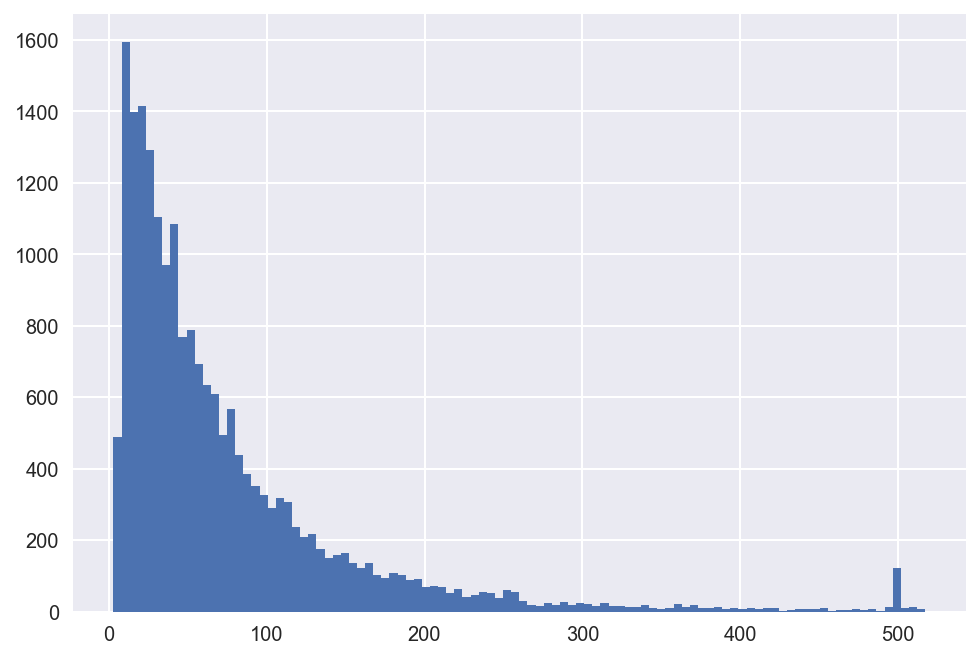

In [68]:
df['COMENTARIO'].apply(lambda x: len(x.strip())).hist(bins=100)

In [21]:
from unidecode import unidecode
import re

In [22]:
lemmatize = {}
with open('lemmatization-es.txt') as f:
    lemmatize = {unidecode(line.split()[1]): unidecode(line.split()[0]) for line in f.readlines()}
lemmatize['para'] = 'para'
lemmatize['nos'] = 'nos'
lemmatize['como'] = 'como'
lemmatize['estuvieramos'] = 'estar'
lemmatize['lo'] = 'lo'
lemmatize['el'] = 'el'
lemmatize['la'] = 'el'
lemmatize['los'] = 'el'
lemmatize['las'] = 'el'
lemmatize['una'] = '1'
lemmatize['uno'] = '1'
lemmatize['un'] = '1'
lemmatize['dos'] = '2'
lemmatize['nada'] = 'nada'
lemmatize['espacio'] = 'espacio'
lemmatize['persona'] = 'persona'
lemmatize['personas'] = 'persona'

In [23]:
vocab = Counter()
for comment in df['COMENTARIO']:
    vocab.update([lemmatize.get(unidecode(x), unidecode(x)) for x in re.sub(r"[;, \(\)',!?._-]", " ", comment.lower()).split()])

In [24]:
len(vocab) # 17,384

7740

In [25]:
vocab.most_common(10)

[('el', 27768),
 ('de', 13130),
 ('que', 8271),
 ('y', 8077),
 ('en', 7200),
 ('ser', 6761),
 ('no', 4580),
 ('a', 3590),
 ('1', 3508),
 ('para', 3464)]

In [125]:
pd.DataFrame(vocab.most_common(), columns=['Word', 'Frequency']).to_csv('Vocabulary.csv', index=False)

In [156]:
df[df['COMENTARIO'].apply(lambda x: len(x)>300)]

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
9,26698,1,FC,109,7,No es posible que para tener que matricularme...,NaN,Delegado,4.0,NaN,2
16,33316,2,FC,105,7,"Primero, cambiar el horario de estudios cuand...",NaN,NaN,3.0,NaN,1
19,8773,1,AC,34,4,Demasiadas personas dentro del campus han qui...,NaN,Delegado,6.0,NaN,1
52,29495,4,FC,107,4,La enseñanza y temas son engaña muchachosel c...,NaN,NaN,4.0,NaN,1
70,7462,3,AC,5,5,Falta de aulas en cursos como Investigación d...,NaN,NaN,5.0,NaN,2
89,23451,1,AC,5,7,"Respecto a la plataforma para celulares, la a...",NaN,NaN,6.0,NaN,3
184,25885,4,FC,101,3,La matrícula de este ciclo fue una pesadilla ...,NaN,NaN,4.0,NaN,1
200,15117,3,AC,7,6,Hay tantas personas en la universidad que par...,NaN,Delegado,4.0,NaN,2
214,5634,1,AC,37,1,Porque sé que tiene una malla distinta a otra...,NaN,Delegado,6.0,NaN,4
235,19910,2,AC,32,1,"en el exceso de alumnos no bien preparados, e...",NaN,NaN,6.0,NaN,1


In [75]:
df[df['COMENTARIO'].apply(lambda x: len(x)>300)]['COMENTARIO'][952]

' Me han estafado. No hay áreas de esparcimiento, no hay áreas PARA ESTUDIAR, nos tratan como animales o como si estuviéramos en un Micro. Buscan llenar la universidad sin criterio y no hay espacio para tantas personas. Tengo que hacer cola 20 minutos para subir el elevador porque solo hay UNO en el pabellón B que tiene 7 PISOS. Es ridículo lo que hacen con nosotros y una terrible falta de respeto. No hay suficientes libros ni nada de lo que un estudiante necesita. Y que decir de la matrícula, alg'

## Text to features

In [26]:
from nltk.corpus import stopwords
stopwords = [unidecode(x) for x in stopwords.words('spanish')]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
def tokenize(text):
    return [lemmatize.get(unidecode(x), unidecode(x)) for x in re.sub(r"[;, \(\)',!?._-]", " ", text.lower()).split()]

In [157]:
vectorizer = TfidfVectorizer(stop_words=stopwords, max_features=700, tokenizer=tokenize, max_df=0.9, min_df=4)

In [158]:
text_features = vectorizer.fit_transform(df['COMENTARIO'])

In [159]:
text_features.shape

(20000, 700)

In [163]:
df_ml.shape

(20000, 14)

In [165]:
run_models(text_features.toarray(), df_ml['NPS'])

LogisticRegression 		 Accuracy: -0.83 (+/- 0.01) Time: 1548 ms
SGDClassifier 		 Accuracy: -0.84 (+/- 0.02) Time: 3458 ms
GaussianNB 		 Accuracy: -19.66 (+/- 0.82) Time: 2435 ms
MultinomialNB 		 Accuracy: -0.83 (+/- 0.01) Time: 1463 ms
BernoulliNB 		 Accuracy: -1.16 (+/- 0.04) Time: 1553 ms
XGBClassifier 		 Accuracy: -0.93 (+/- 0.01) Time: 888506 ms
RandomForestClassifier 		 Accuracy: -2.84 (+/- 0.10) Time: 14284 ms
GradientBoostingClassifier 		 Accuracy: -0.92 (+/- 0.01) Time: 1275265 ms


c:\users\robertalonso\anaconda2\envs\tensorflow1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
c:\users\robertalonso\anaconda2\envs\tensorflow1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
c:\users\robertalonso\anaconda2\envs\tensorflow1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
c:\users\robertalonso\anaconda2\envs\tensorflow1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't con

MLPClassifier 		 Accuracy: -1.33 (+/- 0.19) Time: 364239 ms


c:\users\robertalonso\anaconda2\envs\tensorflow1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


### Mix features

In [29]:
def run_model(clf, X, y, scoring='neg_log_loss', verbose=0):
    start = int(time.time() * 1000)
    scores = cross_val_score(clf, X, y, cv=5, scoring=scoring, verbose=verbose)
    end = int(time.time() * 1000)
    print("%s \t\t %s: %0.2f (+/- %0.2f) Time: %d ms" % \
          (str(clf.__class__).split('.')[-1].replace('>','').replace("'",''), \
            scoring, \
          scores.mean(), scores.std() * 2, end - start))

In [183]:
df[df['COMENTARIO'].apply(lambda x: len(x)>300)]['COMENTARIO'][952]

' Me han estafado. No hay áreas de esparcimiento, no hay áreas PARA ESTUDIAR, nos tratan como animales o como si estuviéramos en un Micro. Buscan llenar la universidad sin criterio y no hay espacio para tantas personas. Tengo que hacer cola 20 minutos para subir el elevador porque solo hay UNO en el pabellón B que tiene 7 PISOS. Es ridículo lo que hacen con nosotros y una terrible falta de respeto. No hay suficientes libros ni nada de lo que un estudiante necesita. Y que decir de la matrícula, alg'

In [184]:
print(tokenize(df[df['COMENTARIO'].apply(lambda x: len(x)>300)]['COMENTARIO'][952]))

['me', 'haber', 'estafar', 'no', 'haber', 'areas', 'de', 'esparcimiento', 'no', 'haber', 'areas', 'para', 'estudiar', 'nos', 'tratar', 'como', 'animal', 'o', 'como', 'si', 'estar', 'en', '1', 'micro', 'buscar', 'llenar', 'el', 'universidad', 'sin', 'criterio', 'y', 'no', 'haber', 'espacio', 'para', 'tanto', 'persona', 'tener', 'que', 'hacer', 'cola', '20', 'minuto', 'para', 'subir', 'el', 'elevador', 'porque', 'solo', 'haber', '1', 'en', 'el', 'pabellon', 'b', 'que', 'tener', '7', 'piso', 'ser', 'ridiculo', 'lo', 'que', 'hacer', 'con', 'nosotros', 'y', '1', 'terrible', 'falto', 'de', 'respetar', 'no', 'haber', 'suficiente', 'libro', 'ni', 'nada', 'de', 'lo', 'que', '1', 'estudiante', 'necesitar', 'y', 'que', 'decir', 'de', 'el', 'matricular', 'alg']


In [246]:
vectorizer = TfidfVectorizer(stop_words=stopwords, max_features=1000, tokenizer=tokenize, max_df=0.7, min_df=4, ngram_range=(1,3))

In [247]:
text_features = vectorizer.fit_transform(df['COMENTARIO'])

In [248]:
text_features.shape

(20000, 1000)

In [252]:
# New Feature
df_ml['Longitud Comentario'] = df['COMENTARIO'].apply(lambda x: len(x))

In [270]:
max_ = df_ml['Longitud Comentario'].max()
df_ml['Longitud Comentario'] = df_ml['Longitud Comentario'] / max_

In [272]:
X = pd.concat((df_ml.drop(['NPS'], axis=1), pd.DataFrame(text_features.toarray())), axis=1)
y = df_ml['NPS']
X.shape

(20000, 1014)

In [273]:
run_model(MultinomialNB(), X, y, scoring='accuracy')
run_model(MultinomialNB(), X, y)

MultinomialNB 		 accuracy: 0.68 (+/- 0.01) Time: 1671 ms
MultinomialNB 		 neg_log_loss: -0.83 (+/- 0.01) Time: 1466 ms


In [274]:
run_model(LogisticRegression(), X, y, scoring='accuracy')
run_model(LogisticRegression(), X, y)

LogisticRegression 		 accuracy: 0.68 (+/- 0.01) Time: 6777 ms
LogisticRegression 		 neg_log_loss: -0.82 (+/- 0.01) Time: 6381 ms


In [275]:
run_model(SGDClassifier(loss='log'), X, y, scoring='accuracy')
run_model(SGDClassifier(loss='log'), X, y)

SGDClassifier 		 accuracy: 0.63 (+/- 0.07) Time: 6164 ms
SGDClassifier 		 neg_log_loss: -1.42 (+/- 0.78) Time: 6266 ms


In [276]:
run_model(XGBClassifier(), X, y, scoring='accuracy')
run_model(XGBClassifier(), X, y)

XGBClassifier 		 accuracy: 0.64 (+/- 0.01) Time: 1427827 ms
XGBClassifier 		 neg_log_loss: -0.93 (+/- 0.01) Time: 1181395 ms


## Workflow summary

In [69]:
df = pd.read_excel('train_universidad.xlsx', sheetname=1)

In [94]:
df_ml = df.copy(deep=True)
df_ml = df_ml.drop('COD_ENCUESTADO', axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['Nombre Campus'], prefix='Campus')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['NIVEL ACTUAL'], prefix='Nivel')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['IND_GEA'], prefix='GEA')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['IND_DELEGADO'], prefix='Delegado')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['UOD_depostista_ind_deportista'], prefix='Deportista')), axis=1)
df_ml = df_ml.drop('Nombre Campus', axis=1)
df_ml = df_ml.drop('NIVEL ACTUAL', axis=1)
df_ml = df_ml.drop('IND_GEA', axis=1)
df_ml = df_ml.drop('IND_DELEGADO', axis=1)
df_ml = df_ml.drop('UOD_depostista_ind_deportista', axis=1)
df_ml = df_ml.drop('Clave de carrera', axis=1)
df_ml = df_ml.drop('COMENTARIO', axis=1)
df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'] = df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'].fillna(df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'].median())

# New Feature
df_ml['Longitud Comentario'] = df['COMENTARIO'].apply(lambda x: len(x))
max_ = df_ml['Longitud Comentario'].max()
df_ml['Longitud Comentario'] = df_ml['Longitud Comentario'] / max_

from unidecode import unidecode
import re
lemmatize = {}
with open('lemmatization-es.txt') as f:
    lemmatize = {unidecode(line.split()[1]): unidecode(line.split()[0]) for line in f.readlines()}
lemmatize['para'] = 'para'
lemmatize['nos'] = 'nos'
lemmatize['como'] = 'como'
lemmatize['estuvieramos'] = 'estar'
lemmatize['lo'] = 'lo'
lemmatize['el'] = 'el'
lemmatize['la'] = 'el'
lemmatize['los'] = 'el'
lemmatize['las'] = 'el'
lemmatize['una'] = '1'
lemmatize['uno'] = '1'
lemmatize['un'] = '1'
lemmatize['dos'] = '2'
lemmatize['nada'] = 'nada'
lemmatize['espacio'] = 'espacio'
lemmatize['persona'] = 'persona'
lemmatize['personas'] = 'persona'

from nltk.corpus import stopwords
stopwords = [unidecode(x) for x in stopwords.words('spanish')]

from sklearn.feature_extraction.text import TfidfVectorizer
def tokenize(text):
    return [lemmatize.get(unidecode(x), unidecode(x)) for x in re.sub(r"[;, \(\)',!?._-]", " ", text.lower()).split()]
    
vectorizer = TfidfVectorizer(stop_words=stopwords, max_features=1000, tokenizer=tokenize, max_df=0.7, min_df=4, ngram_range=(1,3))
text_features = vectorizer.fit_transform(df['COMENTARIO'])

X = pd.concat((df_ml.drop(['NPS'], axis=1), pd.DataFrame(text_features.toarray())), axis=1)
y = df_ml['NPS']
X.shape

(20000, 1014)

In [54]:
X.ix[:,:20].describe(include='all')

,Ciclo,CANT_CURSOS_MATRICU_SIN_INGLES,Campus_1,Campus_2,Campus_3,Campus_4,Nivel_AC,Nivel_FC,Nivel_ON LINE,Nivel_PRESENCIAL,GEA_GEA,Delegado_Delegado,Deportista_Deportista,Longitud Comentario,0,1,2,3,4,5
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.05240,4.788900,0.225200,0.149100,0.418050,0.207650,0.749500,0.232250,0.000600,0.017650,0.014950,0.176600,0.007400,0.146890,0.026613,0.000552,0.006014,0.002606,0.000521,0.000430
std,2.35532,1.404007,0.417724,0.356196,0.493251,0.405635,0.433312,0.422278,0.024488,0.131679,0.121356,0.381339,0.085707,0.155971,0.072549,0.014684,0.042597,0.031168,0.015309,0.011927
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.00000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.622977,0.576629,0.550558,0.677220,0.466275


In [95]:
run_model(MultinomialNB(), X, y, scoring='accuracy')
run_model(MultinomialNB(), X, y)

MultinomialNB 		 accuracy: 0.68 (+/- 0.01) Time: 1656 ms
MultinomialNB 		 neg_log_loss: -0.83 (+/- 0.01) Time: 1612 ms


In [96]:
model_nb = MultinomialNB()
model_nb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

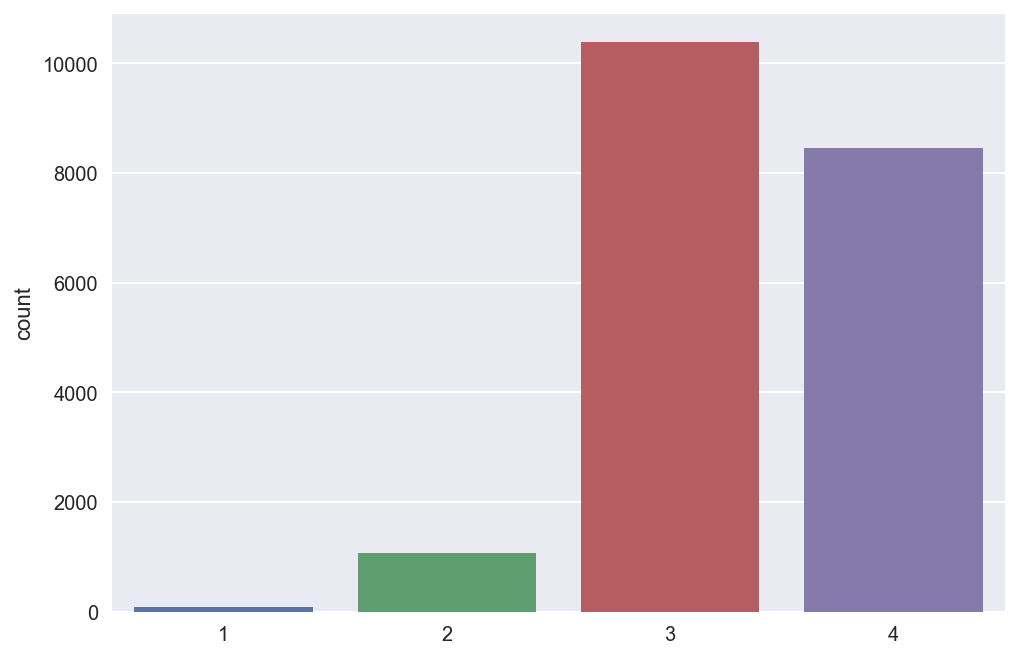

In [97]:
sns.countplot(x=model_nb.predict(X))

In [71]:
model = XGBClassifier(silent=False)
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

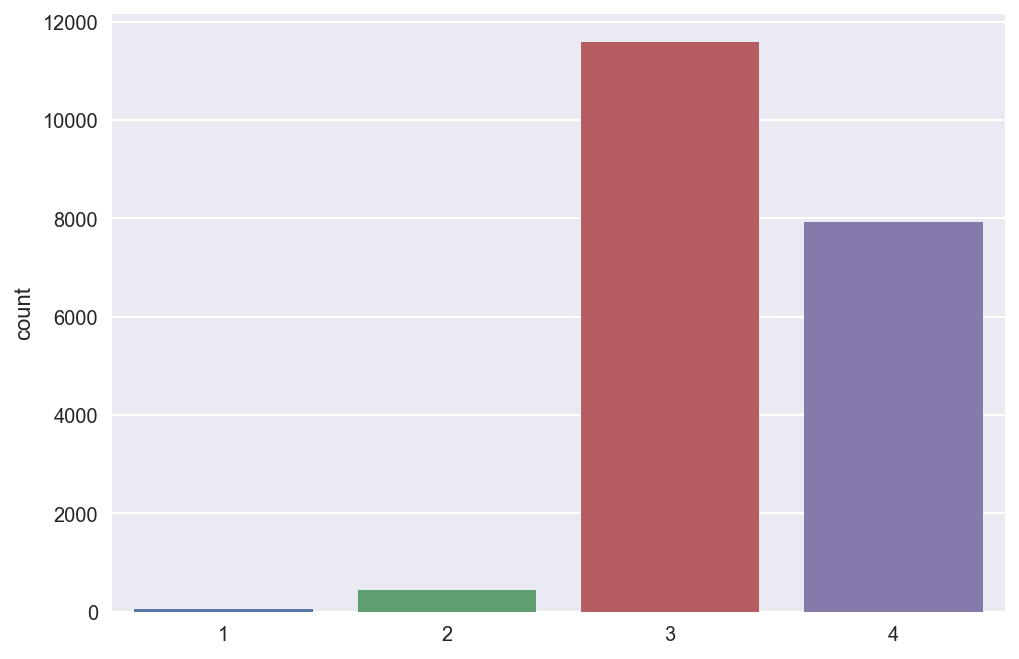

In [72]:
sns.countplot(x=model.predict(X))

## Testing

In [98]:
df_ml_save = df_ml.copy(deep=True)

In [99]:
df_test = pd.read_excel('test_universidad.xlsx')

In [100]:
df_ml = df_test.copy(deep=True)
df_ml = df_ml.drop('COD_ENCUESTADO', axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['Nombre Campus'], prefix='Campus')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['NIVEL ACTUAL'], prefix='Nivel')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['IND_GEA'], prefix='GEA')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['IND_DELEGADO'], prefix='Delegado')), axis=1)
df_ml = pd.concat((df_ml, pd.get_dummies(df_ml['UOD_depostista_ind_deportista'], prefix='Deportista')), axis=1)
df_ml = df_ml.drop('Nombre Campus', axis=1)
df_ml = df_ml.drop('NIVEL ACTUAL', axis=1)
df_ml = df_ml.drop('IND_GEA', axis=1)
df_ml = df_ml.drop('IND_DELEGADO', axis=1)
df_ml = df_ml.drop('UOD_depostista_ind_deportista', axis=1)
df_ml = df_ml.drop('Clave de carrera', axis=1)

df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'] = df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'].fillna(df_ml['CANT_CURSOS_MATRICU_SIN_INGLES'].median())

# New Feature
df_ml['Longitud Comentario'] = df_ml['COMENTARIO'].apply(lambda x: len(x))
max_ = df_ml['Longitud Comentario'].max()
df_ml['Longitud Comentario'] = df_ml['Longitud Comentario'] / max_
    
text_features = vectorizer.transform(df_ml['COMENTARIO'])

df_ml = df_ml.drop('COMENTARIO', axis=1)

X = pd.concat((df_ml, pd.DataFrame(text_features.toarray())), axis=1)
X.shape

(8427, 1014)

In [101]:
y_pred = model_nb.predict(X)

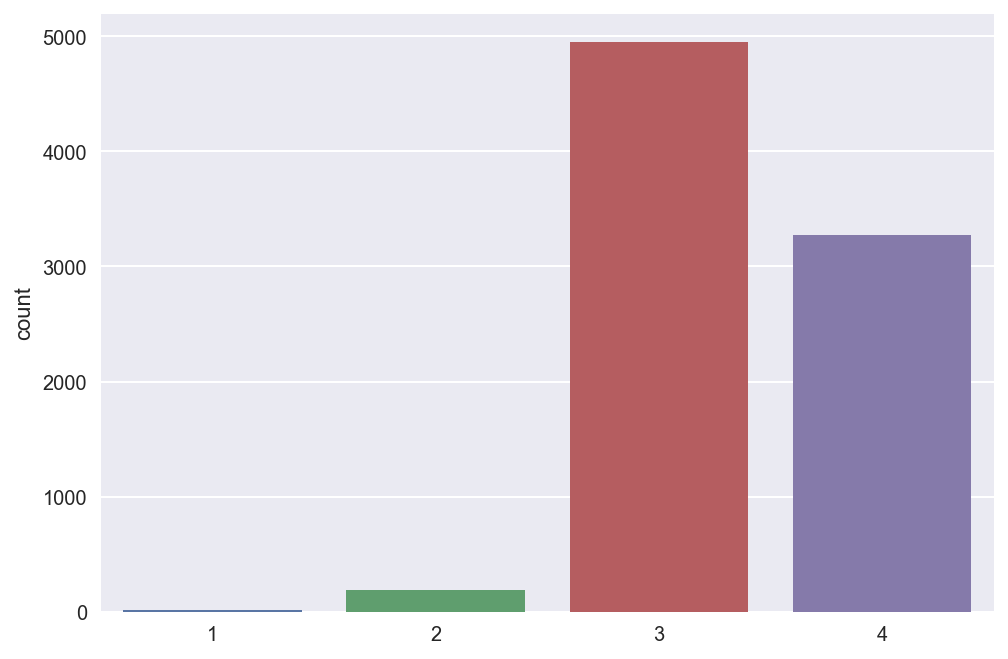

In [77]:
sns.countplot(x=y_pred)

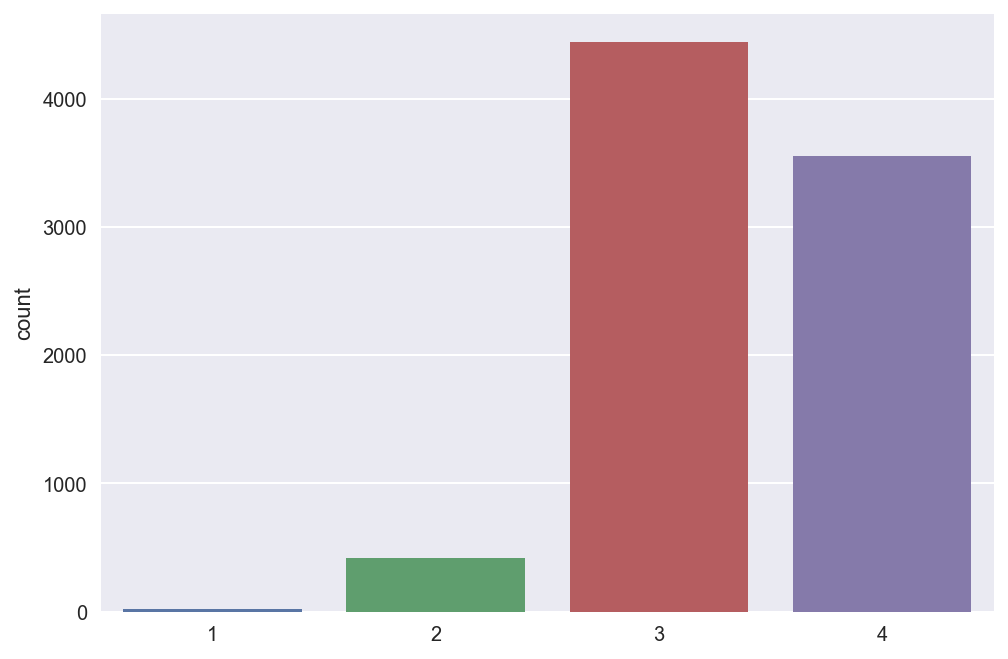

In [60]:
sns.countplot(x=y_pred)

In [102]:
df_check = pd.concat((df_test['COMENTARIO'], pd.DataFrame(y_pred, columns=['TARGET'])), axis=1)

In [111]:
df_check.head(5).style.set_properties(subset=['COMENTARIO'], **{'width': '600px'})

In [109]:
y_pred_proba = model.predict_proba(X)

In [113]:
df_submit = pd.concat((df_test['COD_ENCUESTADO'], df_test['COMENTARIO'], pd.DataFrame(y_pred_proba, columns=['NPS1', 'NPS2', 'NPS3', 'NPS4'])), axis=1)
df_submit.head()

,COD_ENCUESTADO,COMENTARIO,NPS1,NPS2,NPS3,NPS4
0,15118,La universidad debería de ser mas exigente co...,0.044130,0.196859,0.531970,0.227042
1,6715,No me han fallafo en nada,0.058000,0.234696,0.467047,0.240258
2,27492,"Prestigio, calidad de enseñanza de los profes...",0.009531,0.020952,0.040663,0.928855
3,29693,Educacion de calidad y con exigencia.,0.019382,0.047902,0.070853,0.861864
4,29677,No cumplen con los convenios académicos de de...,0.098579,0.301093,0.490969,0.109359


In [116]:
df_submit.drop('COMENTARIO', axis=1).to_csv('NB.csv', index=False)

## # TODO

- Clustering de carreras
- NLP sobre comentario
- Corrección ortográfica
- Identificar más palabras importantes
- Balancear data